# **Project Name**    - AIRBNB BOOKING ANALYSIS








##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Shakshi Bansal


# **Project Summary -**

Airbnb, Inc. is an online marketplace for long & short term rental accomodations founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia.

This Project will include all the process that is required to perform data analysis - Data Discovery & Understanding, Wrangling , visualization & statistical analysis when required.

We analyzed the given dataset which had around 49000 listings. Our main objective is to find key factors that influence the properties listings & relationships between them. We will achieve this in various steps

Data discovery - where we import the data & get some information about the data EDA or exploratory data analysis - where we will analyze the data using charts & statistics [if necessary]. This can help us finding valuable insights that we can use to make descisions that will help our organisation to increase their profits.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Analyze the Airbnb NYC 2019 dataset to discover key insights that can help in understanding customer and host behavior, inform business decisions, and identify trends in the listings.

#### **Define Your Business Objective?**

Airbnb is a platform that connects travelers with hosts offering unique accommodations. With millions of listings, data analysis is crucial for security, business decisions, understanding user behavior, and enhancing the service.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     # Importing the libraries


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head() # head method for looking the first 5 rows.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()
# there is no Duplicate value present in the dataset

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


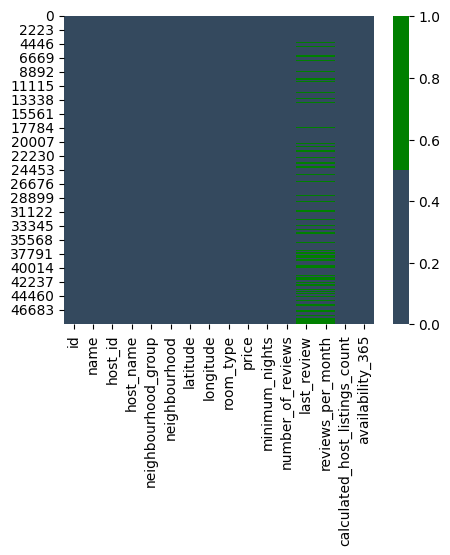

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,4))

colours = ['#34495E', 'green']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.show()

Since theres a lot of null values , i need to impute null values

for numerical columns , replace null values with median values [just in case if there are outliers]

for categorical columns , replace null values with 'null' string

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna('NULL')
  else:
    df[col] = df[col].fillna(df[col].median()) # Using fillna method for puuting null values in colums

In [ ]:
df.isnull().sum() # all missing values have been filled

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### What did you know about your dataset?

The Datset Contains varaibles and data objects with dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.238930,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.520861,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

All the Columns name can be fetch using info function. There are total of 16 columns such as id,name,host_id,latitude,price,reviews_peer_month,etc.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  unique_l = df[i].unique()
  print(f' \n\n---- Unique vals for column "{i}"----- \n\n {unique_l}') # Using for loop for finding unique value in each column

 

---- Unique vals for column "id"----- 

 [    2539     2595     3647 ... 36485431 36485609 36487245]
 

---- Unique vals for column "name"----- 

 ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
 

---- Unique vals for column "host_id"----- 

 [     2787      2845      4632 ... 274321313  23492952  68119814]
 

---- Unique vals for column "host_name"----- 

 ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
 

---- Unique vals for column "neighbourhood_group"----- 

 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
 

---- Unique vals for column "neighbourhood"----- 

 ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = df.drop(['id','host_id'] , axis=1) # Droping useless columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

### What all manipulations have you done and insights you found?

**Answer Here.  1] Removed useless columns - ID ,Host ID**

**2] Imputed Null values with NUll[in categorical columns] & median[in numerical columns]**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# frequency table for each neighborhood_group & neighborhood , top 10
temp = df.groupby(['neighbourhood_group', 'neighbourhood']).size().nlargest(10)

temp

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
dtype: int64

<Axes: title={'center': 'Count per neighborhood group'}, xlabel='Neighborhood Group', ylabel='Count'>

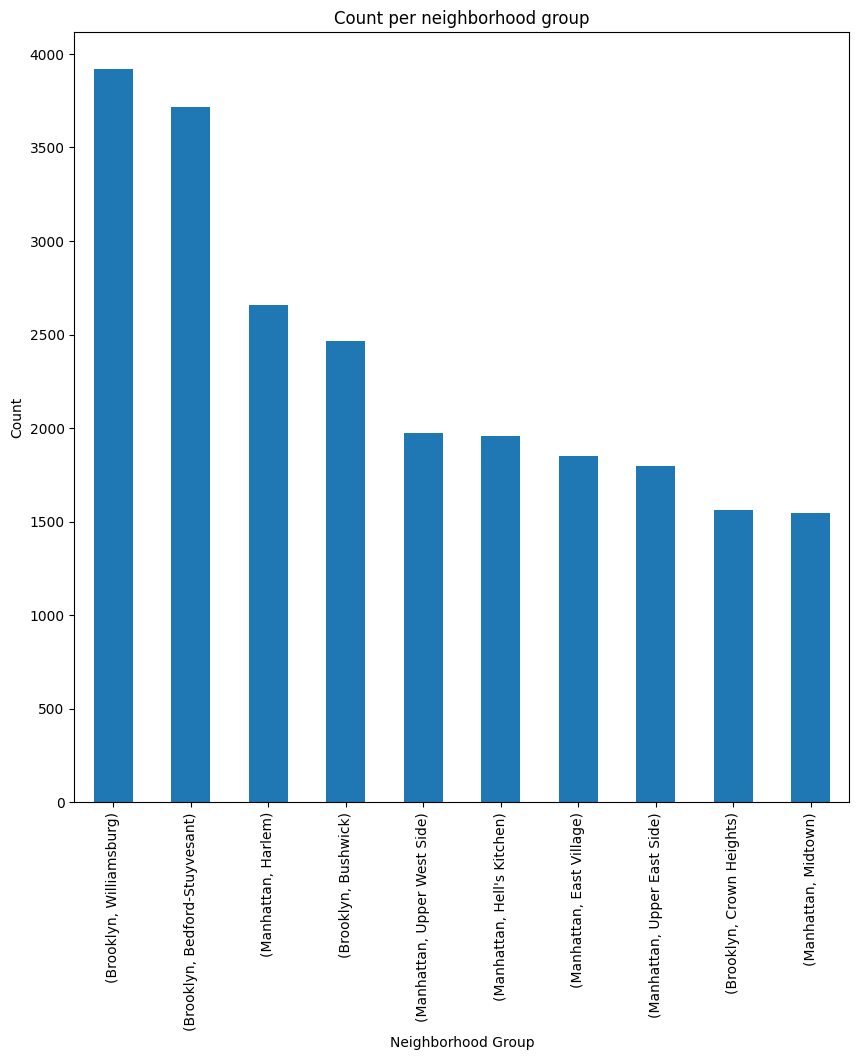

In [ ]:
temp.plot(kind='bar', title='Count per neighborhood group', ylabel='Count',
         xlabel='Neighborhood Group', figsize=(10, 10)) #Bar chart

##### 1. Why did you pick the specific chart?

Answer - Bar chart is used for comparing all categorical values

##### 2. What is/are the insight(s) found from the chart?

Answer - Most of listings are in Brooklyn or Manhattan

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - :If you want to rent out flats , then Brooklyn & Manhattan are the best places.

#### Chart - 2

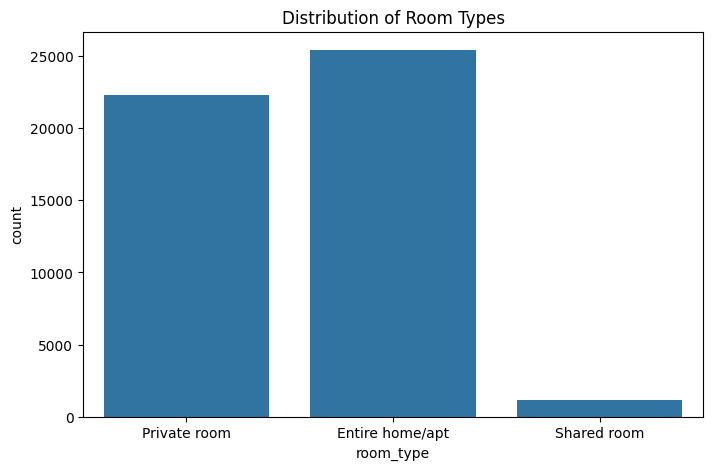

In [ ]:
# Chart - 2 visualization code
# Room Type Distribution: (2)

plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df) # Using the count or Bar chart for ploting catagorical data of rooms
plt.title('Distribution of Room Types')
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Bar chart is used for comparing all categorical values

##### 2. What is/are the insight(s) found from the chart?

Answer - Entire homes & private rooms are majority of listings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - From the given dataset and from the Bar Chart it seems like private rooms & entire homes are in demand.

#### Chart - 3

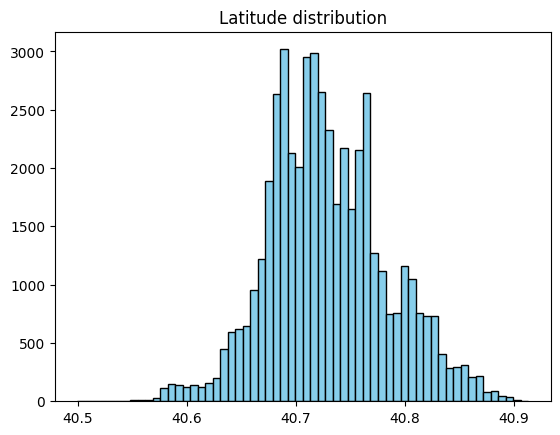

In [ ]:
# Chart - 3 visualization code
plt.hist(df['latitude'], bins=60, color='skyblue', edgecolor='black') #

plt.title('Latitude distribution') # Using Histogram


plt.show()

##### 1. Why did you pick the specific chart?

Answer - Histogram is suitable for univariate analysis in the form of bars.

##### 2. What is/are the insight(s) found from the chart?

Answer - Majority of listings lies between latitudes - 40.65 - 40.75.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - If you want to advertise your flat you can do it in these Latitude locations.

#### Chart - 4

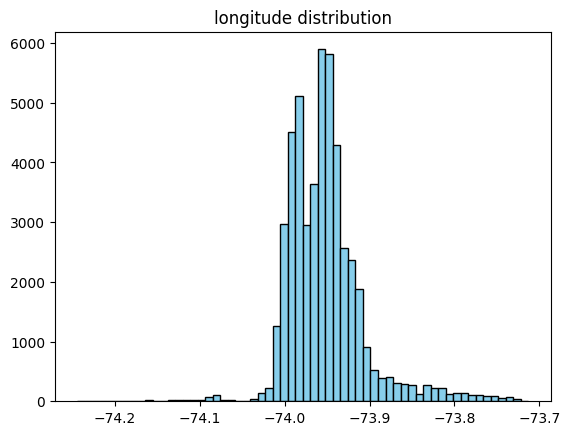

In [ ]:
# Chart - 4 visualization code
plt.hist(df['longitude'], bins=60, color='skyblue', edgecolor='black') #

plt.title('longitude distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Histogram is suitable for univariate analysis in the form of bars.

##### 2. What is/are the insight(s) found from the chart?

Answer - Majority of Listings lie in longitude ranges - 74-73.9.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - If you want to advertise your flat you can do it in these longitude locations.

#### Chart - 5

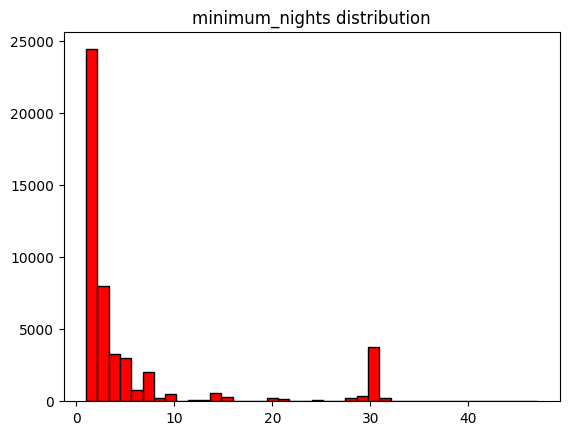

In [ ]:
# Chart - 5 visualization code
temp = df[df['minimum_nights']<50]

plt.hist(temp['minimum_nights'], bins=40, color='red', edgecolor='black') #

plt.title('minimum_nights distribution')


plt.show()

##### 1. Why did you pick the specific chart?

Answer - Histogram is suitable for univariate analysis in the form of bars.

##### 2. What is/are the insight(s) found from the chart?

Answer - Majority of listings have 0 to 10 min nights, there are also  considerable number of 30 minimum nights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - 0 to 10 minimum nights & 30 nights package seems to be the industry standards here.

#### Chart - 6

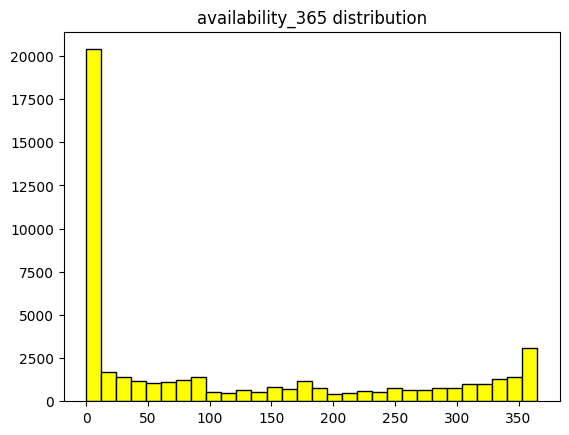

In [ ]:
# Chart - 6 visualization code
plt.hist(temp['availability_365'], bins=30, color='yellow', edgecolor='black') #

    # Adding labels and title
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
plt.title('availability_365 distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Histogram is suitable for univariate analysis in the form of bars .

##### 2. What is/are the insight(s) found from the chart?

Answer - Majority of listings are available for 0-100 days per year , msot likely weekends [52 weeks per year i.e 52 weekends around 100 days]. There are also a lot of listings that are available almost entire year here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - If you are starting a rental business , then it is advisable to make it available for weekends here.

#### Chart - 7

**Bivariate analysis - Avg Price per neighborhood group & neighborhood**

In [ ]:
# Chart - 7 visualization code
temp = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().nlargest(10)

temp


neighbourhood_group  neighbourhood    
Staten Island        Fort Wadsworth       800.000000
                     Woodrow              700.000000
Manhattan            Tribeca              490.638418
Brooklyn             Sea Gate             487.857143
Bronx                Riverdale            442.090909
Staten Island        Prince's Bay         409.500000
Manhattan            Battery Park City    367.557143
                     Flatiron District    341.925000
Staten Island        Randall Manor        336.000000
Manhattan            NoHo                 295.717949
Name: price, dtype: float64

<Axes: title={'center': 'Count per neighborhood group'}, xlabel='Neighborhood Group', ylabel='Count'>

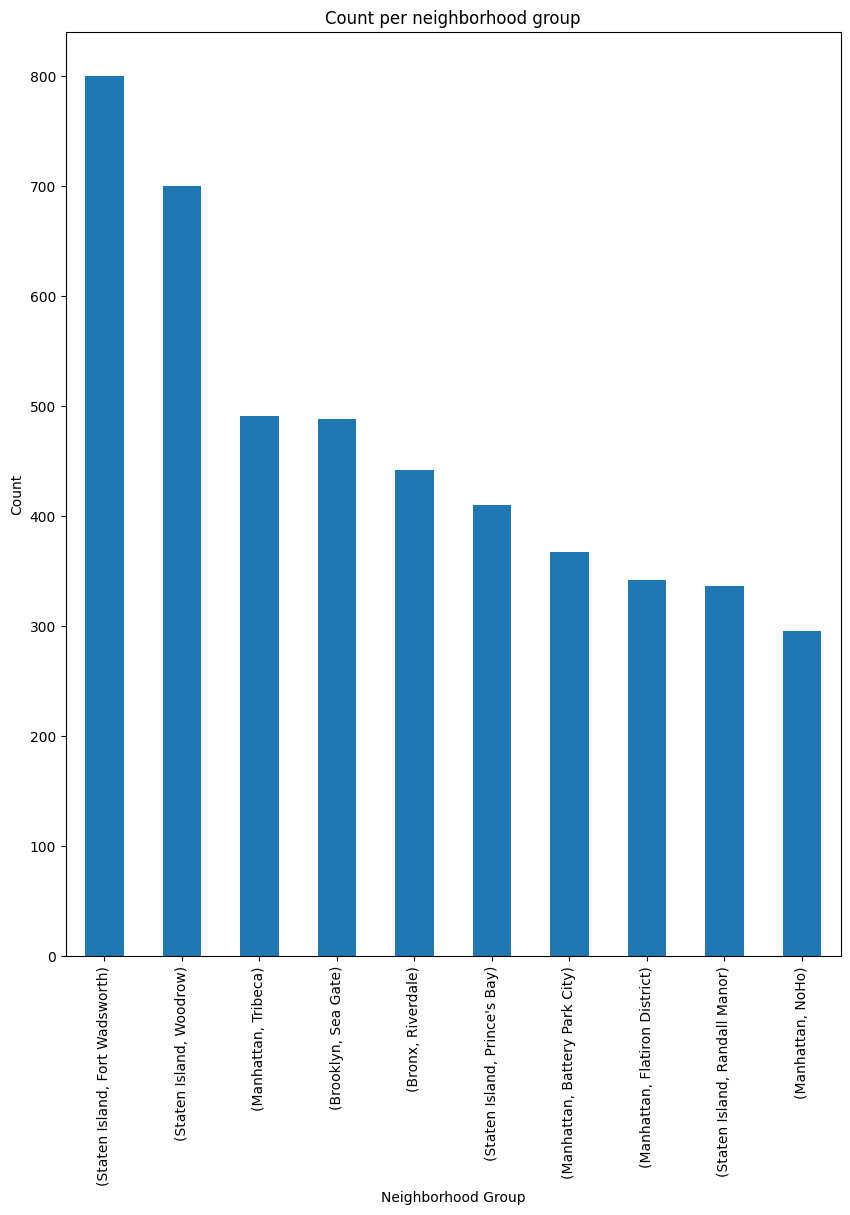

In [ ]:
temp.plot(kind='bar', title='Count per neighborhood group', ylabel='Count',
         xlabel='Neighborhood Group', figsize=(10, 12)) # using bar chart

##### 1. Why did you pick the specific chart?

Answer - Bar chart are for comparing all categorical values.

##### 2. What is/are the insight(s) found from the chart?

Answer - Staten Island & Manhattan are the most expensive , then Bronx & Brooklyn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - If you want to setup a high end apartment for rent then these are the places to do so - Staten islands , Manhattan

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
temp = df.groupby(['room_type'])['price'].mean().nlargest(10)

temp


,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


<Axes: title={'center': 'Avg price per room type'}, xlabel='room type', ylabel='Avg Price'>

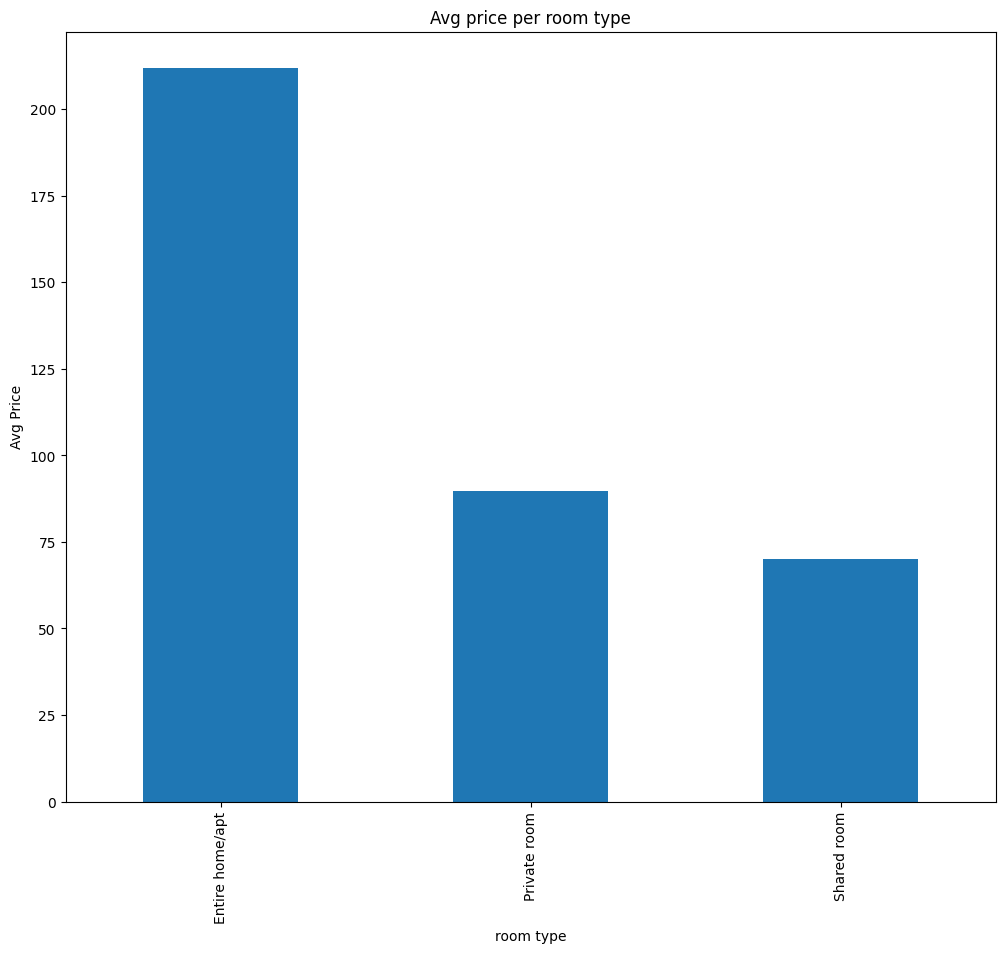

In [ ]:
temp.plot(kind='bar', title='Avg price per room type', ylabel='Avg Price',
         xlabel='room type', figsize=(12, 10))

##### 1. Why did you pick the specific chart?

Answer - Bar charts are the best to compare categorical values.

##### 2. What is/are the insight(s) found from the chart?

Answer - Entire homes/apartmentys are the most expensive followed by private rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - For Maximum profits, Invest in entire apatments/rooms & private rooms.

#### Chart - 9

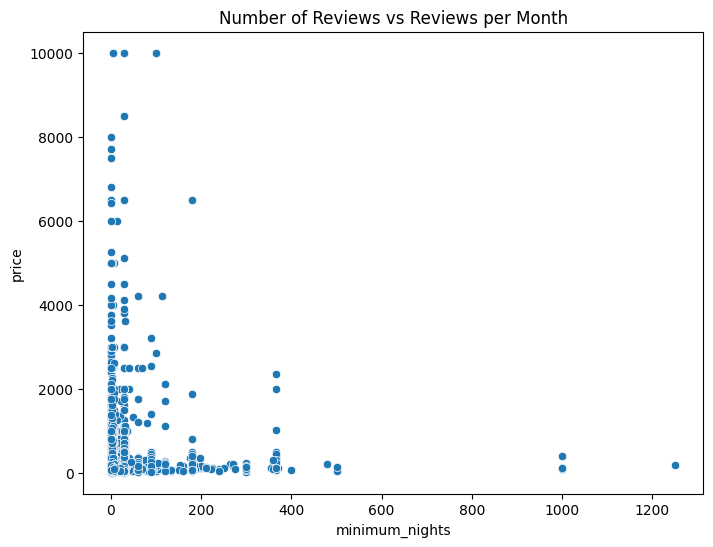

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df) # Using scatterplot to show the no of Reviews in days of a month
plt.title('Number of Reviews vs Reviews per Month')
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Scatterplot is best to analyze correlation between 2 variables.

##### 2. What is/are the insight(s) found from the chart?

Answer - It seems like listings with less minimum nights seems to be more popular & charged more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - Keep the minimum nights as less as possible while setting up your rental business.Also include 30,60,90 days package.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# top 10 neighborhoods based on mean availability
temp = df.groupby(['neighbourhood_group', 'neighbourhood'])['availability_365'].mean().nlargest(10)

temp

neighbourhood_group  neighbourhood 
Staten Island        Fort Wadsworth    365.000000
Bronx                Co-op City        364.000000
Staten Island        Willowbrook       351.000000
Bronx                Eastchester       333.461538
Staten Island        Richmondtown      300.000000
Brooklyn             Mill Basin        290.000000
Queens               Edgemere          275.272727
Staten Island        Randall Manor     275.210526
                     West Brighton     274.722222
Bronx                Spuyten Duyvil    270.000000
Name: availability_365, dtype: float64

<Axes: title={'center': 'avg availability_365 per neighborhood group'}, xlabel='Neighborhood Group', ylabel='avg availability_365'>

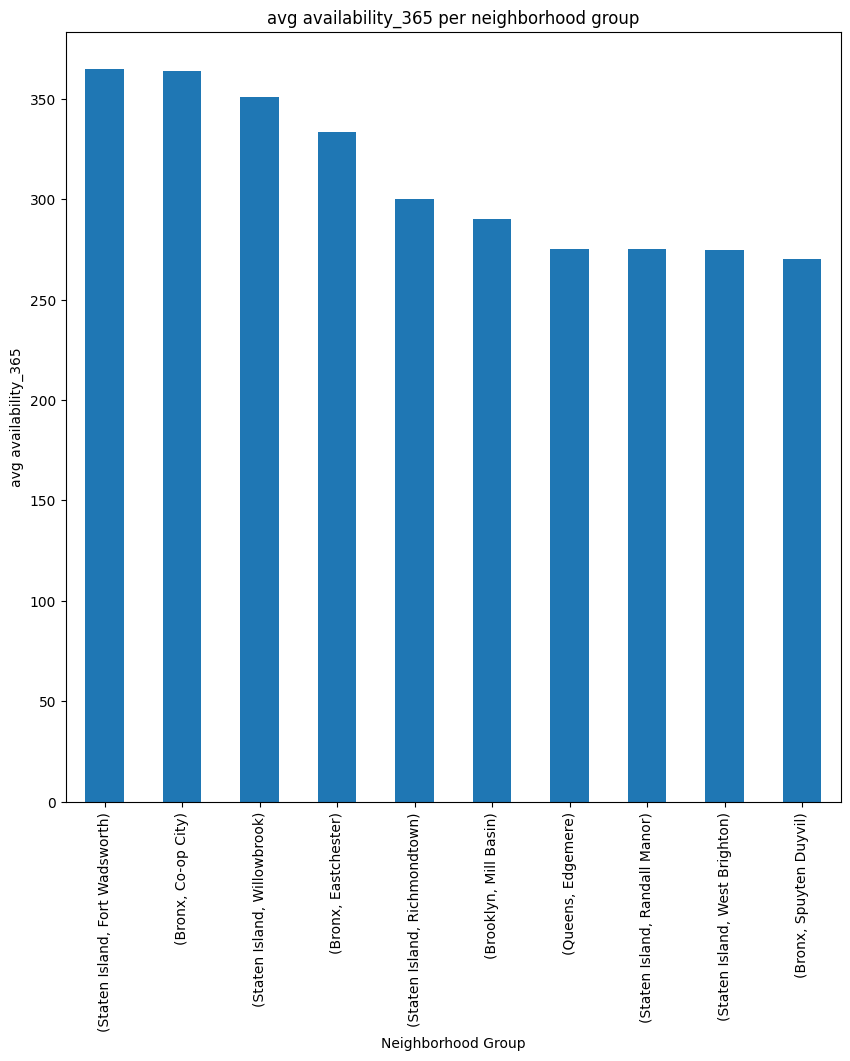

In [ ]:
temp.plot(kind='bar', title='avg availability_365 per neighborhood group', ylabel='avg availability_365',
         xlabel='Neighborhood Group', figsize=(10, 10))

##### 1. Why did you pick the specific chart?

Answer - Bar charts are the best to compare categorical values.

##### 2. What is/are the insight(s) found from the chart?

Answer - Listings in Staten islands & Bronx seem to have highest availability followed by Brooklyn & Queens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - No. of Availability is more in Staten Island as compared to Bronx as Price is less in span of year.

#### Chart - 11 - Correlation Heatmap

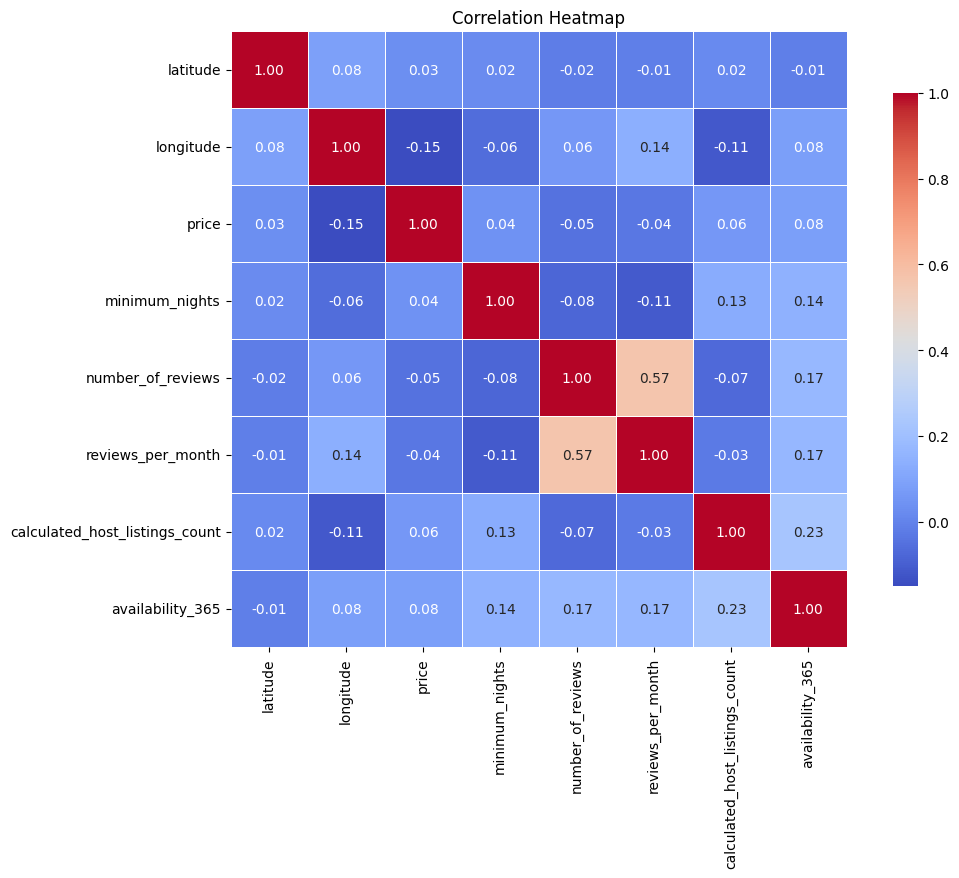

In [ ]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation,
            annot=True,
            fmt=".2f",
            linewidths=.5,
            cmap='coolwarm',
            cbar_kws={"shrink": .8},
            square=True)

# Title for the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Correlation heatmap is the best for analyzing correlations between all possible variables.

##### 2. What is/are the insight(s) found from the chart?

Answer - There is not much correlation between these variables , i.e they are independent.





#### Chart - 12 - Pair Plot

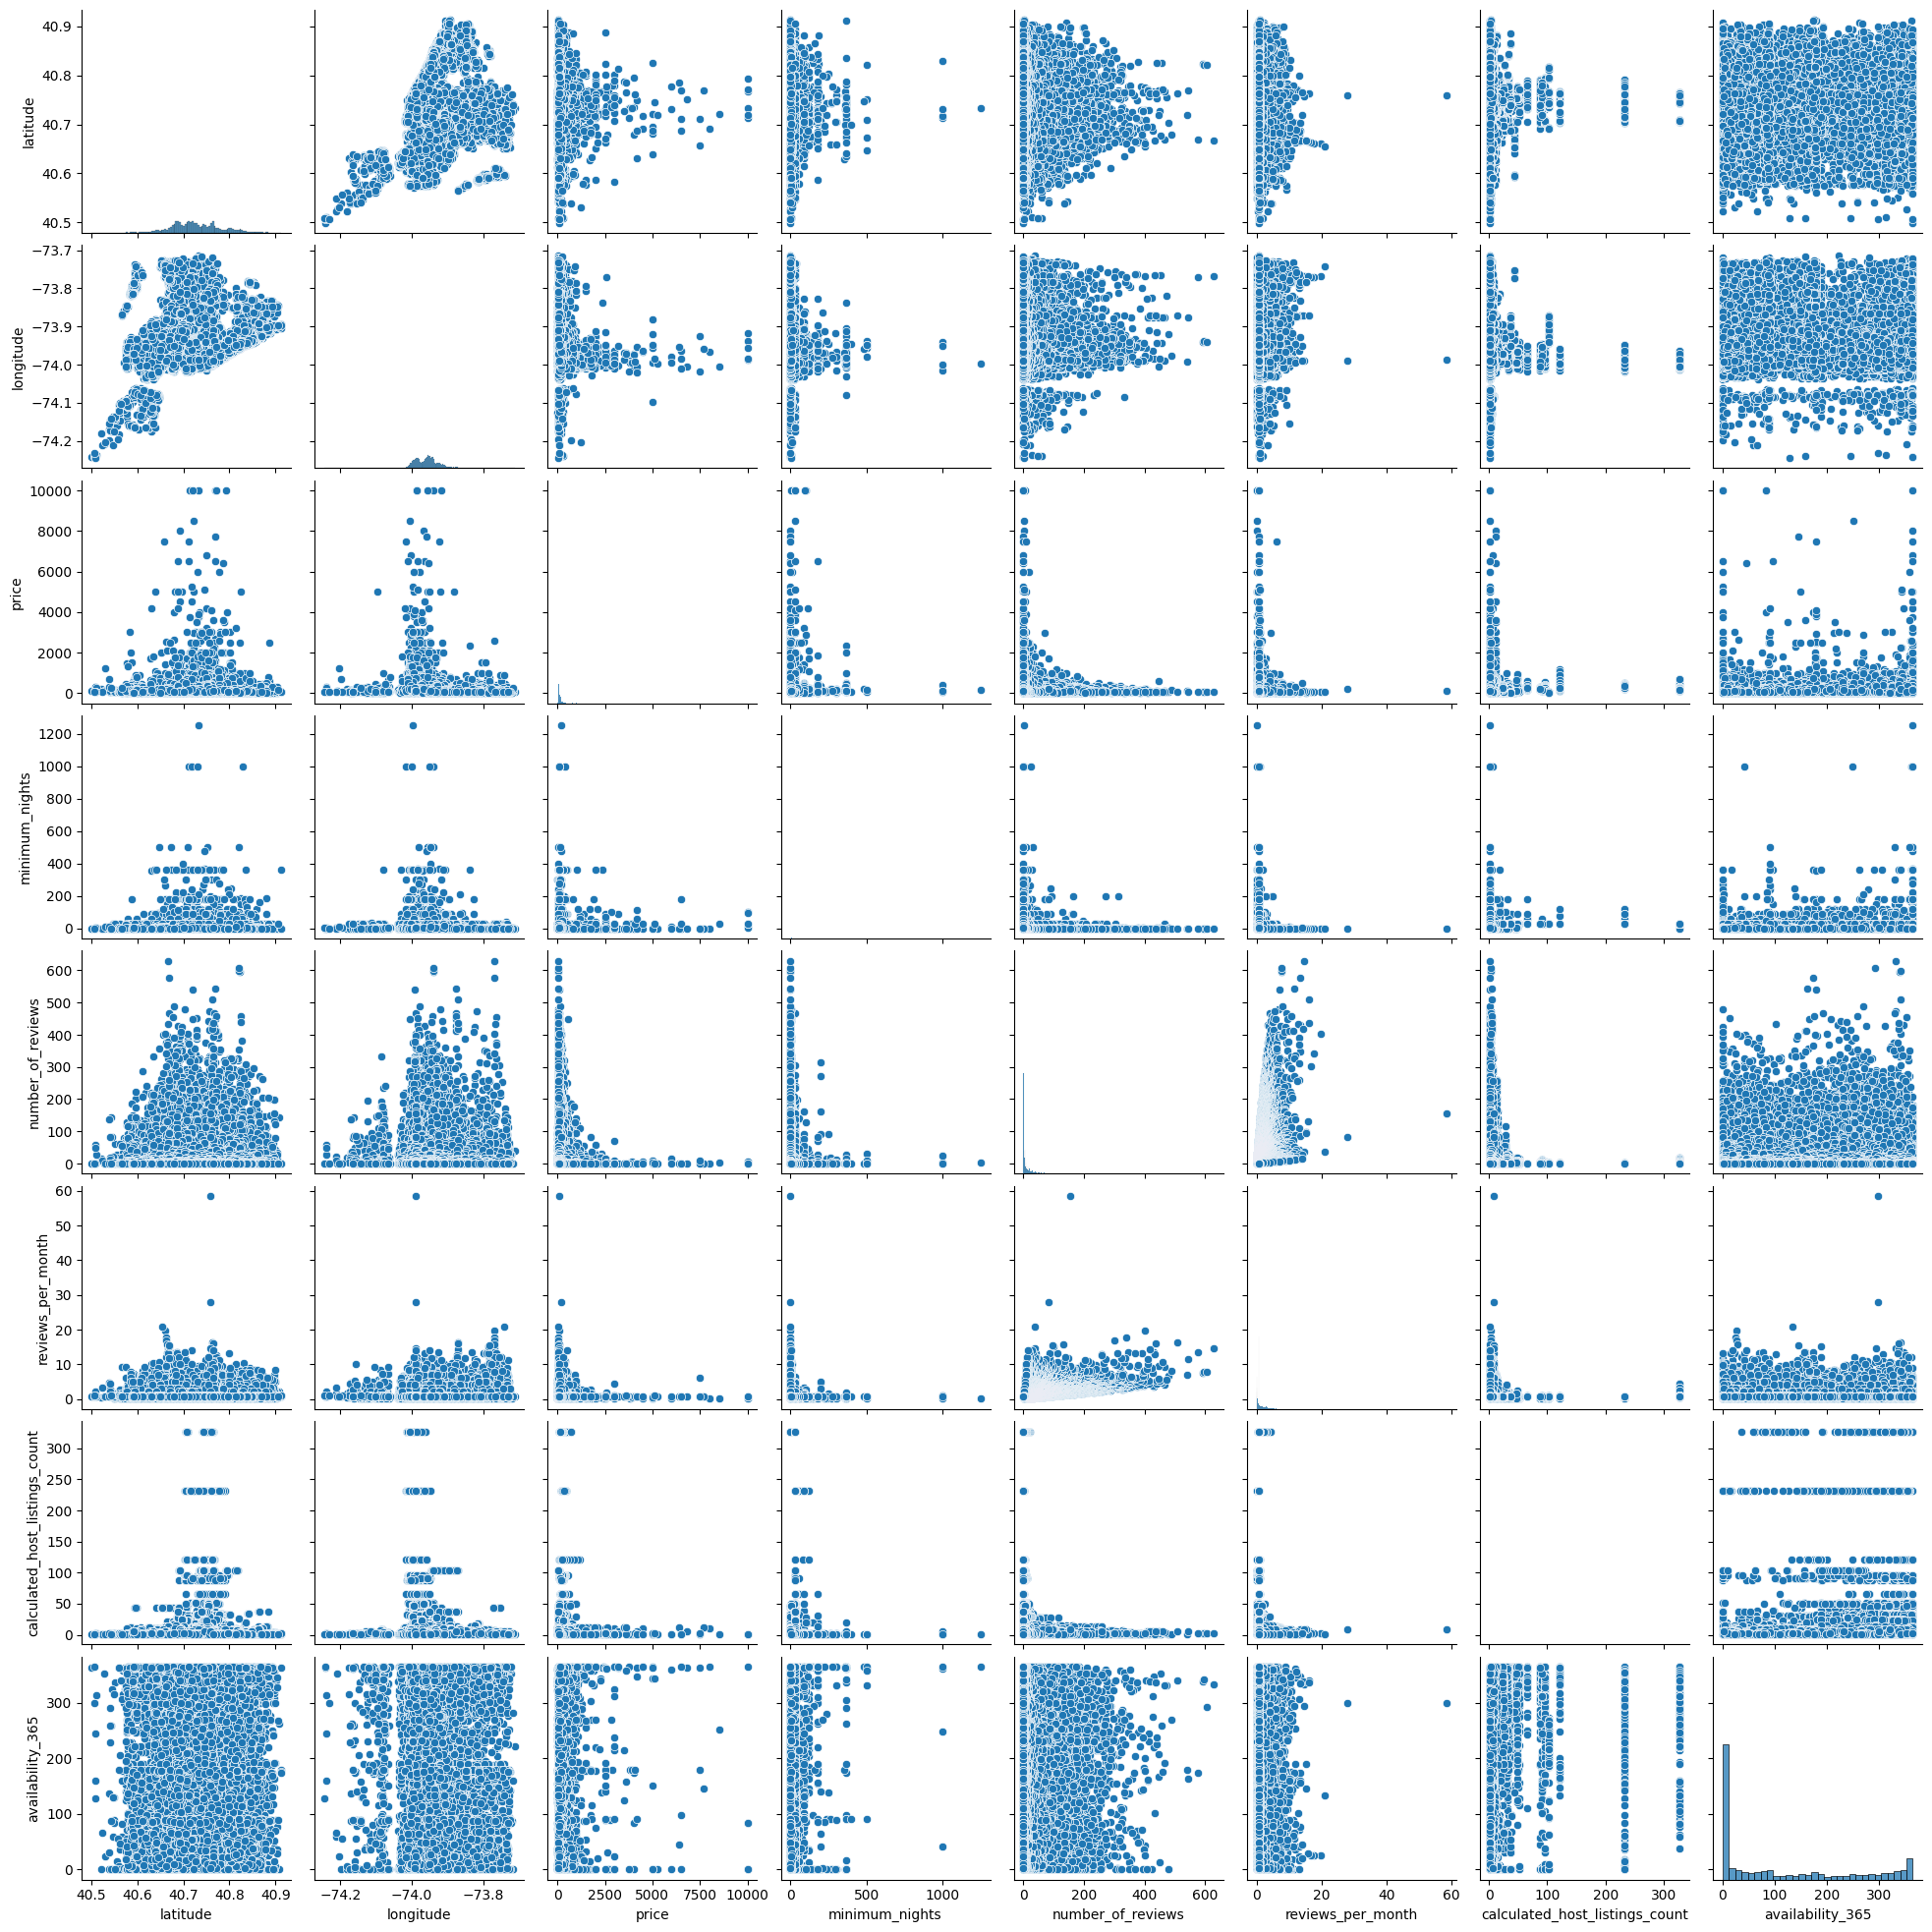

In [ ]:
# Pair Plot visualization code
sns.pairplot(df) # It will show the visualization in the pair with every variables

##### 1. Why did you pick the specific chart?

Answer - Pairplot draws all possible graphs for the given variables.

# **Remarks for Each Analysis in VISUALIZATIONS :**

* Price Distribution: Significant price variation exists across different neighborhoods, with Manhattan having the highest median prices.

* Room Type Distribution: Entire homes/apartments are the most common type of listing.

* Number of Listings per Host: The number of Listing per host is started decline after the First 50 to 100 Users.

* Reviews per Month: The Reviews are Done in the First 10 Days As maximum Users done reviewing the apartment of almost 400+ users as you can in the scatter plot.

* Availability by Neighborhood: In the Availability by neighborhood the 'Manhatten' & 'Brooklyn' is Booked and not available in the span of year. Whereas the states like 'Staten island' & 'Bronx' are Available in the Neighborhood still the 'Queens' is like Booked and Availble most of the same Time as 'Queens' is said to be busy in the Festivle periods.
* The Data Can be Seen the Diffrent forms of Visualization in UBM Rule.

# **Statistical Analysis:**

In [ ]:
# Here Using Statistics analysis from the Module No 5 (Applied Statistics)
# ANOVA to Compare Mean Prices Across Neighborhoods (1)


# A'ANOVA' is a statistical method used to compare the means of
# two or more groups to determine whether there is a statistically significant difference between them.

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats # Importing scipy.stats as a library from the stats python to do the ANOVA

# ANOVA
anova_model = ols('price ~ C(neighbourhood_group)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                              sum_sq       df           F         PR(>F)
C(neighbourhood_group)  7.959096e+07      4.0  354.994839  7.723724e-302
Residual                2.740323e+09  48890.0         NaN            NaN


The Conclusion From the ANOVA is If the p-value in the ANOVA table is less than 0.05, we reject the null hypothesis and conclude that there are significant differences in mean prices across different neighborhood groups.

So The p value is not less than 0.05 te we can't reject the null hypothesis.

In [ ]:
# It's from Module no 5

# Chi-Square Test for Independence between Room Type and Neighborhood Group

# Create a contingency table
contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'])

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi2: {chi2}')
print(f'p-value: {p}') # P- value most important for accepting or rejecting the null hypothesis
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(ex)

Chi2: 1559.5803491465447
p-value: 0.0
Degrees of freedom: 8
Expected frequencies:
[[5.66954065e+02 4.98162716e+02 2.58832191e+01]
 [1.04473369e+04 9.17970966e+03 4.76953472e+02]
 [1.12564546e+04 9.89065315e+03 5.13892218e+02]
 [2.94441955e+03 2.58715852e+03 1.34421925e+02]
 [1.93834891e+02 1.70315942e+02 8.84916658e+00]]


**If the p-value from the Chi-Square test are less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between room type and neighborhood group.**

**CONCLUSION OF STATISTICAL ANALYSIS:**

*   ANOVA: Helps understand if neighborhood influences the price significantly.
*   Chi-Square Test: Helps identify if the distribution of room types varies by neighborhood.

*   This statistical analysis provides a solid foundation for drawing insights from the data and supports decision-making processes.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Answer:**

* Most of listings are in brooklyn or manhattan. If you want to rent out flats , then brooklyn & manhattan are the best places to do it

* Entire homes & private rooms are majority of listings. Seems like private rooms & entire homes are in demand

* Majority of listings lies between latitudes - 40.65 - 40.75. If you want to advertise your flat you can do it in these locations

* Majority of listings lie in longitude ranges - 74-73.9. this can help us to find where we should advertise our flats to rent

* Majority of listings have 0 to 10 min nights, theres also a a considerable number of 30 minimum nights. 0 to 10 minimum nights & 30 nights package seems to be the industry standards

* Majority of listings are available for 0-100 days per year , mosIf youre starting a rental business , then its advisable to make it available for weekends.t likely weekends [52 weeks per year ie 52 weekends ie around 100 days]. There are also a lot of listings that are available almost entire year.

* Staten Island & manhattan are the most expensive , then bronx & brooklyn. If you want to setup a high end apartment for rent theses are the places to do so - Staten islands , manhattan

* The prices & number of listings seems to be higher between latitudes 40.6 - 40.8. For advertising and setting up your rental business , the above latitude range is the best

* Majority of listings lie between longitude -74 to -73.9. The graph shows that the longitude range above has the highest number of renting opportunities & its the best for advertizement.

* Entire homes/apartmentys are the most expensive, followed by private rooms. For maximum profits , invest in entire apatments/rooms & private rooms.

* It seems like listings with lesser minimum nights seems to be more popular & charge more. seems like 30 nights plan are popular too , followed by 60 & 90 nights plans. Keep the minimum nights as less as possible while setting up your rental business. also include 30,60,90 days package.

* Shared rooms have the most availability , followed by entire home & private rooms. If you want to gain max profits , increase availability in entire rooms since theyre more expensive & hence more profitable.

* Listings in staten islands & bronx seems to have highest availability , followed by brooklyn & queens.

# **Conclusion**

Write the conclusion here.

* *Summarizing the key insights and their implications for Airbnb:
Pricing strategies might need to be neighborhood-specific.*

* Marketing efforts could focus on promoting less popular room types or areas.

* Hosts with multiple listings contribute significantly to the platform's supply.

* Reviews are crucial for understanding listing popularity and guest satisfaction

* The dataset contains around 49,000 observations and 16 columns, with a mix of categorical and numeric values.

* The columns likely include information such as listing ID, name, host ID, neighborhood, room type, price, minimum nights, number of reviews, last review date, reviews per month, number of listings per host, availability, and more.

* From the above data analysis process we can deduce that there are certain factors that impacts the properties of listings , like geographical locations , availability , minimum nights etc. The above visualizations displays these very factors & how they impacts the listings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***